# Algorithms 202: Coursework 2 Task 2: Random Shuffling

Author: Jin Ha

## Objectives

The aim of this coursework is to enhance your algorithmic skills by developing algorithms from textual, non-formal descriptions. You are asked to show that you can:

- implement different random shuffling algorithms
- compare those algorithms using visual representations

This notebook *is* the coursework. It contains cells with function definitions that you will need to complete. You will submit this notebook as your coursework.

## Preliminaries: helper functions

Here we define a collection of functions that will be useful for the rest of the coursework. You'll need to run this cell to get started.

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
from random import randint
import numpy as np

## Task 2: Random Shuffling

In this task you are asked to implement `random_sort_shuffle` and `fisher_yates_shuffle`. Additionally, you will need to implement visualisation techniques that can be used to compare the output of the different random shuffling algorithms.

Complete the below function definitions in the provided skeleton code. Do not change the names of the functions or their arguments.

### 2a. Implement `random_sort_shuffle`

The `random_sort_shuffle` function should follow the idea of using a random comparator for sorting the array `a`. See lecture slides for details. You might want to search the web for hints on how to use Python's sort function with a custom comparator. (`functools.cmp_to_key` will be very useful)

In [10]:
from functools import cmp_to_key

def random_sort_shuffle(a):
    return sorted(a, key = cmp_to_key(random_comparator))

def random_comparator(x, y):
    return randint(-1, 1)

### 2b. Implement `fisher_yates_shuffle`

The `fisher_yates_shuffle` function should implement one of the two versions of Fisher-Yates shuffle as outlined in the lecture slides.

In [11]:
def fisher_yates_shuffle(a):
    for i in range(len(a)):
        j = randint(i, len(a) - 1)
        
        temp = a[i]
        a[i] = a[j]
        a[j] = temp
        
    return a

### 2c. Implement buggy `fisher_yates_shuffle`

Check out the lecture slides for two common bugs that are found in Fisher-Yates shuffle implementations. Implement two buggy versions of `fisher_yates_shuffle` for later analysis.

In [12]:
def fisher_yates_shuffle_buggy1(a):
    for i in range(len(a) - 1, 1, -1):
        j = randint(0, i - 1)
        
        temp = a[i]
        a[i] = a[j]
        a[j] = temp
        
    return a

def fisher_yates_shuffle_buggy2(a):
    for i in range(len(a) - 1, 1, -1):
        j = randint(0, len(a) - 1)
        
        temp = a[i]
        a[i] = a[j]
        a[j] = temp
    
    return a

### 2d. Perform empirical analysis

The empirical analysis is aiming to detect bias in the shuffle algorithms implemented above. You should build a swap matrix for each shuffle algorithm by executing them multiple times on suitable sequences with a fixed number of elements that allow you to track the random shuffles of elements.

You can visualise the swap matrices using the `plt.imshow(matrix)` function (see also the notebook on Random Sampling on the use of `plt.imshow`).

Plot the swap matrices and add a few lines of discussion about what you can conclude from the visualisations about possible bias in the different algorithms.

In [13]:
# prior to the analysis, define a helper function, 'diff' which generates(or update) a swap matrix for a shuffling.
def diff(a, b, matrix):
    
    for i in range(len(a)):
        if a[i] != b[i]:
            matrix[a[i]][b[i]] += 1
            matrix[b[i]][a[i]] += 1
            
    return matrix

# do analysis for four different shuffling algorithms

a = list(range(60))

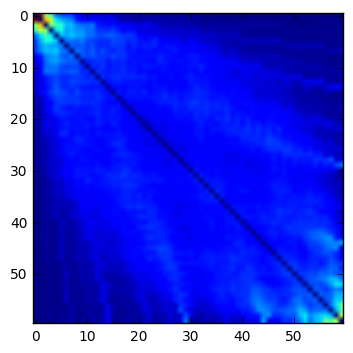

In [14]:
### random_sort_shuffle(a)

random_swap_matrix = [[0 for x in range(len(a))] for x in range(len(a))]

for i in range(10000):
    temp = random_sort_shuffle(a)
    random_swap_matrix = diff(a, temp, random_swap_matrix)
    
plt.imshow(random_swap_matrix)

The plot of the random_sort_shuffle() shows that the top-right and bottom-left corners are much darker compared to the diagonal of the plot. Which means the entries of start and the end of list tend to be swapped much more than the middle ones which implies that the elements of the list are not swapped evenly. Therefore the function, random_sort_shuffle() is biased as the graph shows.

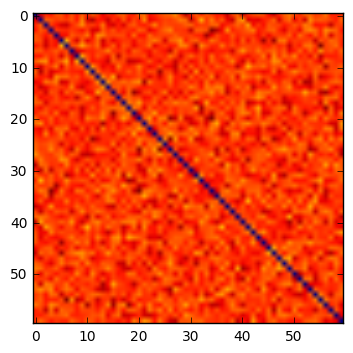

In [15]:
### fisher_yates_shuffle(a)

fisher_swap_matrix = [[0 for x in range(len(a))] for x in range(len(a))]

for i in range(10000):
    temp = list(range(len(a)))
    fisher_yates_shuffle(temp)
    fisher_swap_matrix = diff(a, temp, fisher_swap_matrix)
    
plt.imshow(fisher_swap_matrix)

The graph shows that the elements are swapped evenly as it has even distributed colour. So fisher_yates_shuffle() is an unbiased so each permutation is equally likely. 

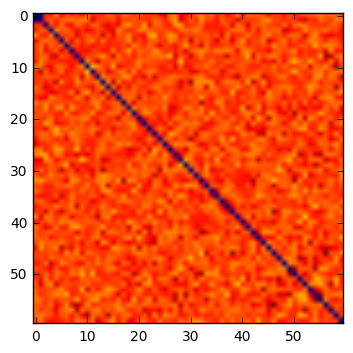

In [16]:
### buggy fisher_yates_shuffle1(a)

buggy_one_swap_matrix = [[0 for x in range(len(a))] for x in range(len(a))]

for i in range(10000):
    temp = list(range(len(a)))
    fisher_yates_shuffle_buggy1(temp)
    buggy_one_swap_matrix = diff(a, temp, buggy_one_swap_matrix)
    
plt.imshow(buggy_one_swap_matrix)

The graph of fisher_yates_buggy2() shows that the colours are uniformly distributed across the entire matrix. However, the first element of the list tend to not be swapped whereas the last one is swapped more often than usual as the top-left and bottom-right corners are darker than normal.

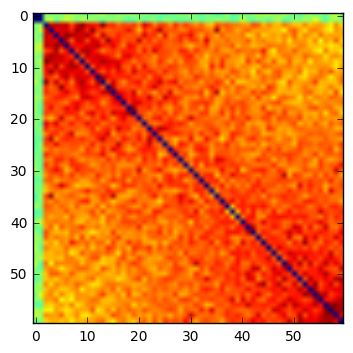

In [17]:
### buggy fisher_yates_shuffle2(a)

buggy_two_swap_matrix = [[0 for x in range(len(a))] for x in range(len(a))]

for i in range(10000):
    temp = list(range(len(a)))
    fisher_yates_shuffle_buggy2(temp)
    buggy_two_swap_matrix = diff(a, temp, buggy_two_swap_matrix)
    
plt.imshow(buggy_two_swap_matrix)

Again, fisher_yates_shuffle_buggy2() shows almost the same plotting as the normal fisher_yates_shuffle() function. Although there seems to be a 'edge' on fisher_yates_buggy2() version, generally the colours reach most of the matrix, there is a distinct observable edge in the fisher_yates_buggy2() plot. This suggests that there is a bias in this function too as the elements at the start of the list don't get swapped as much as the rest of the list.